In [43]:
rawData=open(r"C:\Users\nanaa\OneDrive\Desktop\Victims of witchcraft accusations f.txt").read()

rawData[0:500]

'Victims of witchcraft accusations face alienation or exclusion from their communities. Exclusions can be social, physical, economic or psychological.\n\nSome villages in northern Ghana have become known as places that provide refuge to people banished from their communities. These villages were not created for this purpose. Rather, they are already existing communities that have chosen to provide such refuge.\n\nBanishment happens when someone accused of witchcraft is no longer welcomed in their com'

In [1]:
!pip install textblob


In [2]:
from textblob import TextBlob

In [3]:
s = '''
Victims of witchcraft accusations face alienation or exclusion from their communities. Exclusions can be social, physical, economic or psychological.

Some villages in northern Ghana have become known as places that provide refuge to people banished from their communities. These villages were not created for this purpose. Rather, they are already existing communities that have chosen to provide such refuge.

Banishment happens when someone accused of witchcraft is no longer welcomed in their community. They are asked to leave and never return. Not heeding such advice comes with consequences including violence, abuse, social exclusion and murder.

Sometimes people relocate to a village that’s offering them safety after they’ve been forced to leave their homes following direct threats. In some instances people move when they hear rumours that they risk being accused of witchcraft.

What people who had been banished told me
The purpose of my research inquiry was to gain insights into how individuals accused of witchcraft speak about themselves and their circumstances.

The experiences of those accused varied. As one told me:

They finally threatened that they were going to do their juju, and if I had any knowledge about the child’s sickness, I was going to die within four days. I told them they should go ahead; I was willing to die if I were the one responsible for the child’s sickness. After the ritual, I didn’t die. However, they said I could no longer stay with them in the community.

Another gave this account:

After the death of my husband, the relatives accused me of witchcraft. My in-laws said I killed my husband, but I don’t know anything about it. He fell sick and died afterwards. How can I kill my husband? I was lucky I wasn’t killed. There were lots of chaos, and some of the people suggested that I should be killed. Others disagreed and suggested that I should be brought to Gnani-Tindang … It’s my husband’s people who brought me here.
'''
tb = TextBlob(s)
print(tb.sentiment)

Sentiment(polarity=-0.0257936507936508, subjectivity=0.3481481481481481)


In [5]:
from textblob import TextBlob

with open(r"C:\Users\nanaa\OneDrive\Desktop\Victims of witchcraft accusations f.txt", encoding='utf-8') as infile:
    content = infile.read()

tb = TextBlob(content)
sentences = tb.sentences

print(len(sentences))
print(sentences[0])
print(sentences[-1])


23
Victims of witchcraft accusations face alienation or exclusion from their communities.
Others disagreed and suggested that I should be brought to Gnani-Tindang … It’s my husband’s people who brought me here.


In [6]:
for s in sentences:
    tb = TextBlob(str(s))
    pol = tb.sentiment.polarity
    if abs(pol) > 0.4:
        print(pol)
        print(s)
        print()

-0.7142857142857143
He fell sick and died afterwards.



In [7]:
sub_list = []
pol_list = []

for s in sentences:
    tb = TextBlob(str(s))
    sub_list.append(tb.sentiment.subjectivity)
    pol_list.append(tb.sentiment.polarity)

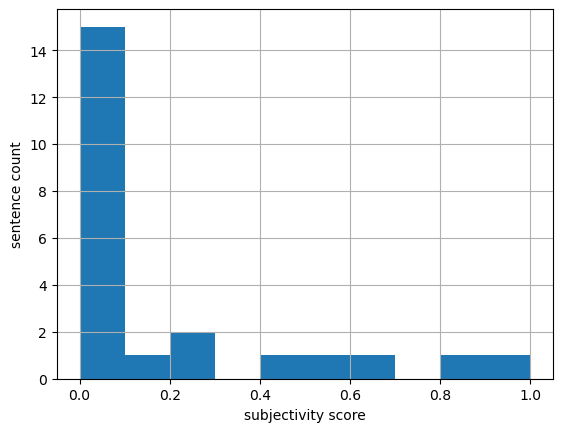

In [9]:

import matplotlib.pyplot as plt

plt.hist(sub_list, bins=10) 

plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('subjectivity.pdf')
plt.show()

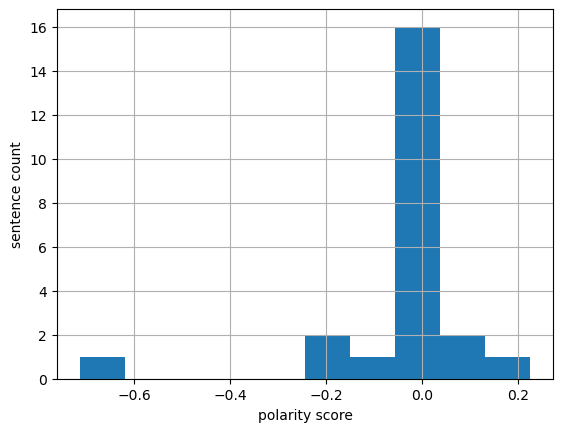

In [10]:
plt.hist(pol_list, bins=10) 

plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('polarity.pdf')
plt.show()

Tokenization

In [11]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from pprint import pprint

with open(r"C:\Users\nanaa\OneDrive\Desktop\Victims of witchcraft accusations f.txt",encoding = 'utf-8') as infile:
    article = infile.read()
print(len(article), article[0:100])

1976 Victims of witchcraft accusations face alienation or exclusion from their communities. Exclusions ca


In [12]:
sentences = nltk.sent_tokenize(article)
pprint(sentences[0])

('Victims of witchcraft accusations face alienation or exclusion from their '
 'communities.')


In [13]:
token_sentences = [word_tokenize(sent) for sent in sentences]
print(token_sentences[0])

['Victims', 'of', 'witchcraft', 'accusations', 'face', 'alienation', 'or', 'exclusion', 'from', 'their', 'communities', '.']


In [14]:
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
pprint(pos_sentences[0])

[('Victims', 'NNS'),
 ('of', 'IN'),
 ('witchcraft', 'NN'),
 ('accusations', 'NNS'),
 ('face', 'VBP'),
 ('alienation', 'NN'),
 ('or', 'CC'),
 ('exclusion', 'NN'),
 ('from', 'IN'),
 ('their', 'PRP$'),
 ('communities', 'NNS'),
 ('.', '.')]


In [16]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\nanaa\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [17]:
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [18]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


NER WITH SPACY

In [1]:
import spacy

In [3]:
nlp=spacy.load("en_core_web_sm")

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import spacy
from collections import defaultdict
from pprint import pprint

In [5]:

nlp = spacy.load('en_core_web_sm', exclude=["tagger","parser","matcher"])

print(nlp)

In [6]:
with open(r"C:\Users\nanaa\OneDrive\Desktop\Victims of witchcraft accusations f.txt",encoding = 'utf-8') as infile:
    article = infile.read()

In [7]:
doc = nlp(article)

C:\Users\nanaa\anaconda3\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [8]:
print(doc[0:100]) 

Victims of witchcraft accusations face alienation or exclusion from their communities. Exclusions can be social, physical, economic or psychological.

Some villages in northern Ghana have become known as places that provide refuge to people banished from their communities. These villages were not created for this purpose. Rather, they are already existing communities that have chosen to provide such refuge.

Banishment happens when someone accused of witchcraft is no longer welcomed in their community. They are asked to leave and never return. Not heeding such advice comes with consequences


In [9]:
doc.ents

(Ghana, Banishment, four days, Gnani-Tindang)

In [23]:
from textblob import TextBlob

text = '''Victims of witchcraft accusations face alienation or exclusion from their communities. Exclusions can be social, physical, economic or psychological.

Some villages in northern Ghana have become known as places that provide refuge to people banished from their communities. These villages were not created for this purpose. Rather, they are already existing communities that have chosen to provide such refuge.

Banishment happens when someone accused of witchcraft is no longer welcomed in their community. They are asked to leave and never return. Not heeding such advice comes with consequences
'''
blob = TextBlob(text)

#  Part-of-speech tagging
print(blob.tags)

#  Sentiment analysis
print(blob.sentiment)


[('Victims', 'NNS'), ('of', 'IN'), ('witchcraft', 'NN'), ('accusations', 'NNS'), ('face', 'VBP'), ('alienation', 'NN'), ('or', 'CC'), ('exclusion', 'NN'), ('from', 'IN'), ('their', 'PRP$'), ('communities', 'NNS'), ('Exclusions', 'NNS'), ('can', 'MD'), ('be', 'VB'), ('social', 'JJ'), ('physical', 'JJ'), ('economic', 'JJ'), ('or', 'CC'), ('psychological', 'JJ'), ('Some', 'DT'), ('villages', 'NNS'), ('in', 'IN'), ('northern', 'JJ'), ('Ghana', 'NNP'), ('have', 'VBP'), ('become', 'VBN'), ('known', 'VBN'), ('as', 'IN'), ('places', 'NNS'), ('that', 'WDT'), ('provide', 'VBP'), ('refuge', 'VB'), ('to', 'TO'), ('people', 'NNS'), ('banished', 'VBN'), ('from', 'IN'), ('their', 'PRP$'), ('communities', 'NNS'), ('These', 'DT'), ('villages', 'NNS'), ('were', 'VBD'), ('not', 'RB'), ('created', 'VBN'), ('for', 'IN'), ('this', 'DT'), ('purpose', 'NN'), ('Rather', 'RB'), ('they', 'PRP'), ('are', 'VBP'), ('already', 'RB'), ('existing', 'VBG'), ('communities', 'NNS'), ('that', 'WDT'), ('have', 'VBP'), ('ch

In [15]:
# create an empty defaultdict
ner_categories = defaultdict(int)

#Found entities and their labels
for ent in doc.ents:
    print('label', ent.label_, '\ttext', ent.text)
    ner_categories[ent.label_] += 1

label GPE 	text Ghana
label PERSON 	text Banishment
label DATE 	text four days
label GPE 	text Gnani-Tindang


In [ ]:
Alternative Using Displacy

In [19]:
for ent in doc.ents:
    print('label', "|", ent.label_, "|", spacy.explain(ent.label_))
  


label | GPE | Countries, cities, states
label | PERSON | People, including fictional
label | DATE | Absolute or relative dates or periods
label | GPE | Countries, cities, states


In [20]:
from spacy import displacy
displacy.render(doc,style="ent")

In [11]:
pprint(ner_categories)

defaultdict(<class 'int'>, {'GPE': 2, 'PERSON': 1, 'DATE': 1})


Visualisation

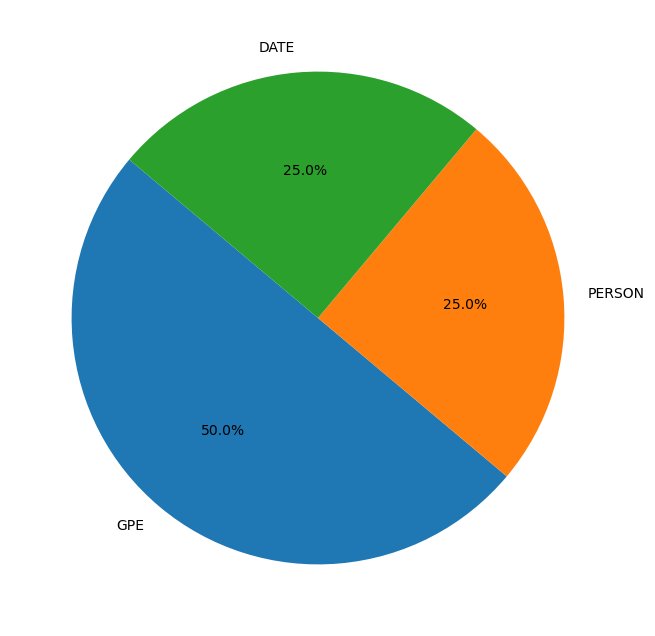

In [21]:
# Create  list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]


# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(values, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=140)

# Display the chart
plt.show()